# Probability

Probability is the logical framework for quantifying uncertainity  and randomness. Central to the subject of probability is the concept of random experiment.

Random Experiment

An experiment whose results may not be same when it is repeated is called an Random Experiment. All possible outcomes of a random experiment is represented by a set called Sample Space S

To do a random experiment we need to define a task whose outcomes are stochiastic (not deterministic). Examples of such tasks are flipping a coin, drawing a card from deck of cards etc... 

When a fair coin is flipped there is a 50% chance for head or tails to appear. For a biased coin we can represent the probability to get a head by p. This is modeled by a bernoulli trial given by
$P(X=x) = p^x(1 - p)^{1-x}$

In the code block below we model a Coin and visualize the outcome by flipping the coin 100 times


In [1]:
import numpy as np
import matplotlib.pyplot as plt

class Coin(object):
    def __init__(self, p=0.5):
        """
        p(float): Represents the probability to get a head. Fair coin by default as p=0.5
        """
        self.p = p
    def flip(self, repeat=1):
        """
        Flips the coin repeat number of times
        repeat(int): Number of times to repeat the experiment
        """
        outcomes = []
        for i in range(repeat):
            outcomes.append(np.random.binomial(1, self.p, 1)[0])
        return outcomes
    def viz(self, outcomes):
        """
        Plots a histogram of distribution
        """
        plt.figure(facecolor=(1, 1, 1))
        plt.title("Probability of getting heads or tails in n trails")
        plt.xlabel(" 0- Tails 1 - Heads")
        plt.ylabel("Number of heads or tails")
        plt.hist(outcomes, density=True, color="green")
        
coin = Coin(0.23)
coin.viz(coin.flip(100))


Random Variable

A random variable is a function which maps sample space S to real numbers R. Output is random because of randomness of experiment on S. So they are numerical summaries of random experiment. Consider the case of flipping a two coins at the same time. We can define a random variable X which counts the number of heads when flipped at the same time. 

| C1 | C2 | X | P(X=k) |
|----|----|---|--------|
| T  | T  | 0 | 0.25   |
| T  | H  | 1 | 0.25   |
| H  | T  | 1 | 0.25   |
| H  | H  | 2 | 0.25   |

P(X=0) = P(T, T) = 0.25

P(X=1) = P(H, T) + P(T, H) = 0.25 + 0.25 = 0.5

P(X=2) = P(H, H) = 0.25

P(X=k) is probability mass function (P.M.F). Cumulative distribution function tells if a random will have a value less than or equal to k.

In the code block below we use binomial distribution to simulate flipping multiple coins and plot the PMF (Probability of getting differnet number of heads)

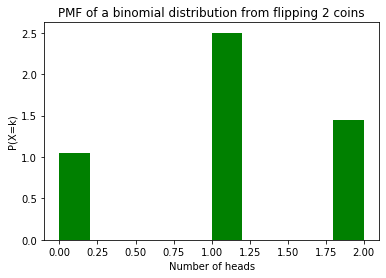

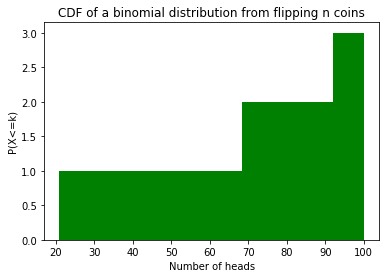

In [2]:
class Coins(object):
    def __init__(self, num_coins, p):
        """
        num_coins(int): Number of coins in experiment
        p(float): probability to get a head
        """
        self.num_coins = num_coins
        self.p = p
    
    def flip(self, num_trails=1):
        """
        Returns number of success after num_trails
        """
        return [np.random.binomial(self.num_coins, self.p) for i in range(num_trails)]
    
    def viz_pmf(self, outcomes):
        """
        Plots probability mass function
        """
        n = len(outcomes)
        plt.figure(facecolor=(1, 1, 1))
        plt.title("PMF of a binomial distribution from flipping " + str(self.num_coins) + " coins")
        plt.xlabel("Number of heads")
        plt.ylabel("P(X=k)")
        plt.hist(outcomes, density=True, color="green")
    
    def viz_cdf(self, outcomes):
        """
        Plots probability mass function
        """
        # Outcome has number of heads for 100 different trails
        # To get CDF we need to find cumulative sum
        cdf_values = [0] * (self.num_coins + 1)
        for head in range(self.num_coins + 1):
            for i in range(len(outcomes)):
                if outcomes[i] <= head:
                    cdf_values[head] += 1
        plt.figure(facecolor=(1, 1, 1))
        plt.title("CDF of a binomial distribution from flipping n coins")
        plt.xlabel("Number of heads")
        plt.ylabel("P(X<=k)")
        plt.hist(cdf_values, color="green", cumulative=True)
        
        
c1 = Coins(2, 0.5)
outcome = c1.flip(100)
c1.viz_pmf(outcome)
c1.viz_cdf(outcome)

## Joint Distributions
If X and Y are two discrete random variables, then the joint probability gives the probability for X=k1 and Y=K2 at the same time.

For example if

X is a random variable for number of letters in a word

Y is a random variable for number of vowels in a word

Then P(X=5;Y=2) gives the probability of finding 5 lettered words with two vowels. Whereas P(Y=1) is called marginal probability which gives probability of finding all words with atleast one vowel.

P(Y=1) = $\sum_{i=1}^{N}$P(X=$x_j$; Y=1)

In [10]:
class Poem:
    def __init__(self, text=None):
        if text is not None:
            self.text = text
        else:
            self.text = """There are numerous strings in your lute, 
let me add my own among them. Then when you smite your chords, 
 my heart will break its silence, and my life will be one with your song.  
"""
        poem_tokens = self.text.strip("\n")
        poem_tokens = poem_tokens.split(" ")
        self.total_words = len(poem_tokens)
        vowels = ['a', 'e', 'i', 'o', 'u']
        self.letter_dict = dict()
        for word in poem_tokens:
            vowel_count = 0
            for letter in word:
                if letter in vowels:
                    vowel_count += 1
            self.letter_dict[word] = {"len": len(word), "vc": vowel_count}

    def joint_prob(self, x=3, y=1):
        list_of_interest = []
        if y < x:
            for key, value in self.letter_dict.items():
                length, vc = value["len"], value["vc"]
                if (length == x) and (vc == y):
                    list_of_interest.append(key)
        else:
            raise ValueError("Expecting more vowels than letters")
        jc_prob = len(list_of_interest) / self.total_words
        print("Joint Probability is " + str(jc_prob))
        print(list_of_interest)
    
    def marg_prob_x(self, x=5):
        loi = []
        for key, value in self.letter_dict.items():
            length, vc = value["len"], value["vc"]
            if length == x:
                loi.append(key)
        mp = len(loi) / self.total_words
        print("Marginal Probability of X is " + str(mp))
        print(loi)
    def marg_prob_y(self, y=5):
        loi = []
        for key, value in self.letter_dict.items():
            length, vc = value["len"], value["vc"]
            if vc == y:
                loi.append(key)
        mp = len(loi) / self.total_words
        print("Marginal Probability of Y is " + str(mp))
        print(loi)
p1 = Poem()
p1.joint_prob(3, 1)
p1.marg_prob_x(3)
p1.marg_prob_y(2)

Joint Probability is 0.10526315789473684
['add', 'own', 'its', 'and']
Marginal Probability of X is 0.18421052631578946
['are', 'add', 'own', 'you', 'its', 'and', 'one']
Marginal Probability of Y is 0.2894736842105263
['There', 'are', 'your', 'lute,', 'among', 'you', 'smite', 'heart', 'break', 'life', 'one']
